# Домашнее задание №1.
## Метод наименьших квадратов.
## Выполнила: Олохтонова Мария Сергеевна
### Группа: НПМбд-01-19


In [1]:
import numpy as np

Многочлен степени $n - 1$ однозначно определяется его значениями в $n$ точках. Для вычисления коэффициентов этого многочлена необходимо решить систему уравнений. Сделаем это, используя функцию np.linalg.solve:

In [2]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def compute_polynomial_coeffs(n):
    '''
    n - количество точек
    '''
    xx = np.linspace(1, 15, n)
    yy = f(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

In [3]:
from matplotlib import pyplot as plt

Т.к. мы параметризовали степень полинома, мы можем посмотреть насколько хорошо приближается исходная функция полиномами разной степени. При $n = 2$ приближение совсем плохое (линия):

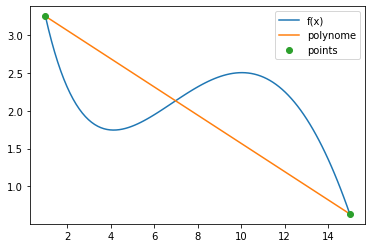

In [4]:
n = 2
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

Полином степени 2 все еще плохо приближает нашу целевую функцию, т.к. она на рассматриваемом отрезке бимодальна (парабола не может в принципе быть бимодальна):

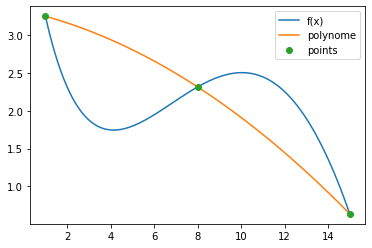

In [5]:
n = 3
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

При $n = 15$ исходная функция на глаз уже практически не отличается от полинома:

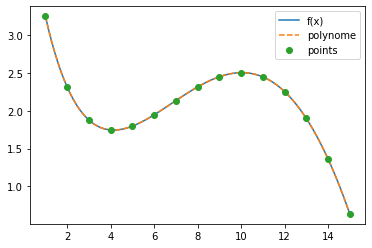

In [6]:
n = 15
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

Реализуем возможность добавлять к значениям исходной функции некоторый случайный шум:

In [7]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def compute_polynomial_coeffs(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

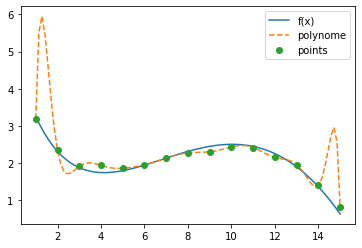

In [8]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

n = 15
noise = 0.1
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

Зашумленные входные данные приводят к неточностям аппроксимации, особенно на концах рассматриваемого отрезка:

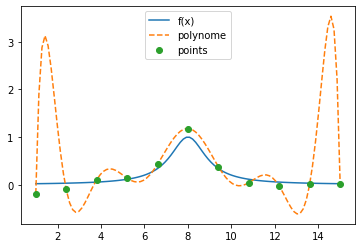

In [9]:
def f(x):
    return 1 / ((x-8)**2 + 1)

n = 11
noise = 0.1
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

Для реализации МНК вынесем создание матрицы $A$ в отдельную функцию compute_A_coeffs. В функции least_squares реализуем собственно сам МНК, используя функции numpy для реализации операций линейной алгебры. В конце распечатаем полученный вектор решения и сравним его с вектором, рассчитанным библиотечной функцией np.linalg.lstsq:

In [18]:
def compute_A_coeffs(xx, N,n):
    '''
    N - количество точек
    n - степень полинома 
    '''
    A = np.zeros((N, n))
    for i in range(n):
        A[:,i] = xx**i
    return A

def least_squares(A,b):
    AtA = A.transpose().dot(A)        # A^T * A
    AtAinv = np.linalg.inv(AtA)       # (A^T * A)^(-1)
    Aplus = AtAinv.dot(A.transpose()) # (A^T * A)^(-1) * A^T = A+
    result = Aplus.dot(b)             # A+ * b
    return result

In [23]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

N = 10
n = 3
xx = np.linspace(1, 15, N)
b = f(xx)
A = compute_A_coeffs(xx, N, n)
w = least_squares(A,b)
w_ref = np.linalg.lstsq(A,b, rcond=None)[0]

print(w)
print(w_ref)


[ 2.38559116  0.03970149 -0.00763552]
[ 2.38559116  0.03970149 -0.00763552]


Результаты изобразим по аналогии с графиками выше. Мы параметризовали и степень полинома $n$, и количество точек $N$. Как можно ожидать, полином второй степени всё еще плохо приближает исходную функцию:

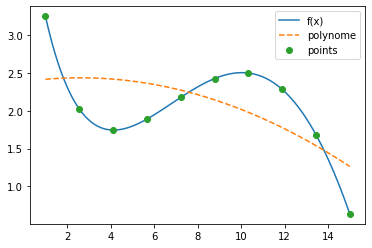

In [24]:
x_draw = np.linspace(1, 15, 100)

plt.plot(x_draw, f(x_draw), label='f(x)')
plt.plot(x_draw, polynome(w, x_draw), '--', label='polynome')
plt.plot(xx, b, 'o', label='points')

plt.legend()

Как и раньше, добавим к исходных данным шум, а также увеличим количество точек, чтобы $N$ стало значительно больше $n$. Можем наблюдать, что полученный полином приходит "где-то посередине" полученного облака точек. Это хорошо :)

[ 3.82070441 -1.01468263  0.1591788  -0.00707868]
[ 3.82070441 -1.01468263  0.1591788  -0.00707868]


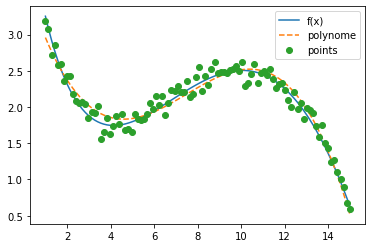

In [34]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

noise = 0.1
N = 100
n = 4
xx = np.linspace(1, 15, N)
b = f(xx) + np.random.randn(N) * noise
A = compute_A_coeffs(xx, N, n)
w = least_squares(A,b)
w_ref = np.linalg.lstsq(A,b, rcond=None)[0]

print(w)
print(w_ref)

x_draw = np.linspace(1, 15, 100)

plt.plot(x_draw, f(x_draw), label='f(x)')
plt.plot(x_draw, polynome(w, x_draw), '--', label='polynome')
plt.plot(xx, b, 'o', label='points')

plt.legend()
